# Tasca M8 T01

## Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv', sep=',')

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Las cuatro últimas columnas están vacias. Las borro.

In [5]:
df = df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1) 

df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Descripción del data frame

Se trata de 7050 publicaciones de facebook dividido en las siguientes columnas:

- status_id: id de la publicación.	
- status_type: Tipo de publicación: link, video, status y foto. 	
- status_published: fecha y hora de la publicación.
- num_reactions: número de reacciones a la publicación (me gusta, me encanta, me sorprende, me divierte, me enoja)
- num_comments: número de comentarios a la publicación
- num_shares: número de veces que se compartió la publicación
- num_likes: Número de me gusta
- num_loves: Número de me encanta
- num_wows: Número de me sorprende
- num_hahas: Número de me divierte
- num_sads: Número de me importa
- num_angrys: Número de me enoja

In [6]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

Teniendo en cuenta que debiera haber solo un status_id por publicación, es posible que haya registros duplicados que se deben borrar

[Fuente](https://www.kaggle.com/code/jaganadhg/fb-live-selling-data-analysis)

In [7]:
df = df.drop_duplicates(subset='status_id', keep='last')

df.shape

(6997, 12)

Elimino las variable de status_ id (en tanto no agruparé usuarios particulares sino tipo de publicaciones) y status_published (porque no deseo agruparlos en función del momento en que se hicieron los post). Ninguna de las variables me sirven para la clausterización que deseo hacer.

In [8]:
df = df.drop(columns=['status_id', 'status_published'], axis=1) 

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Preprocesado**

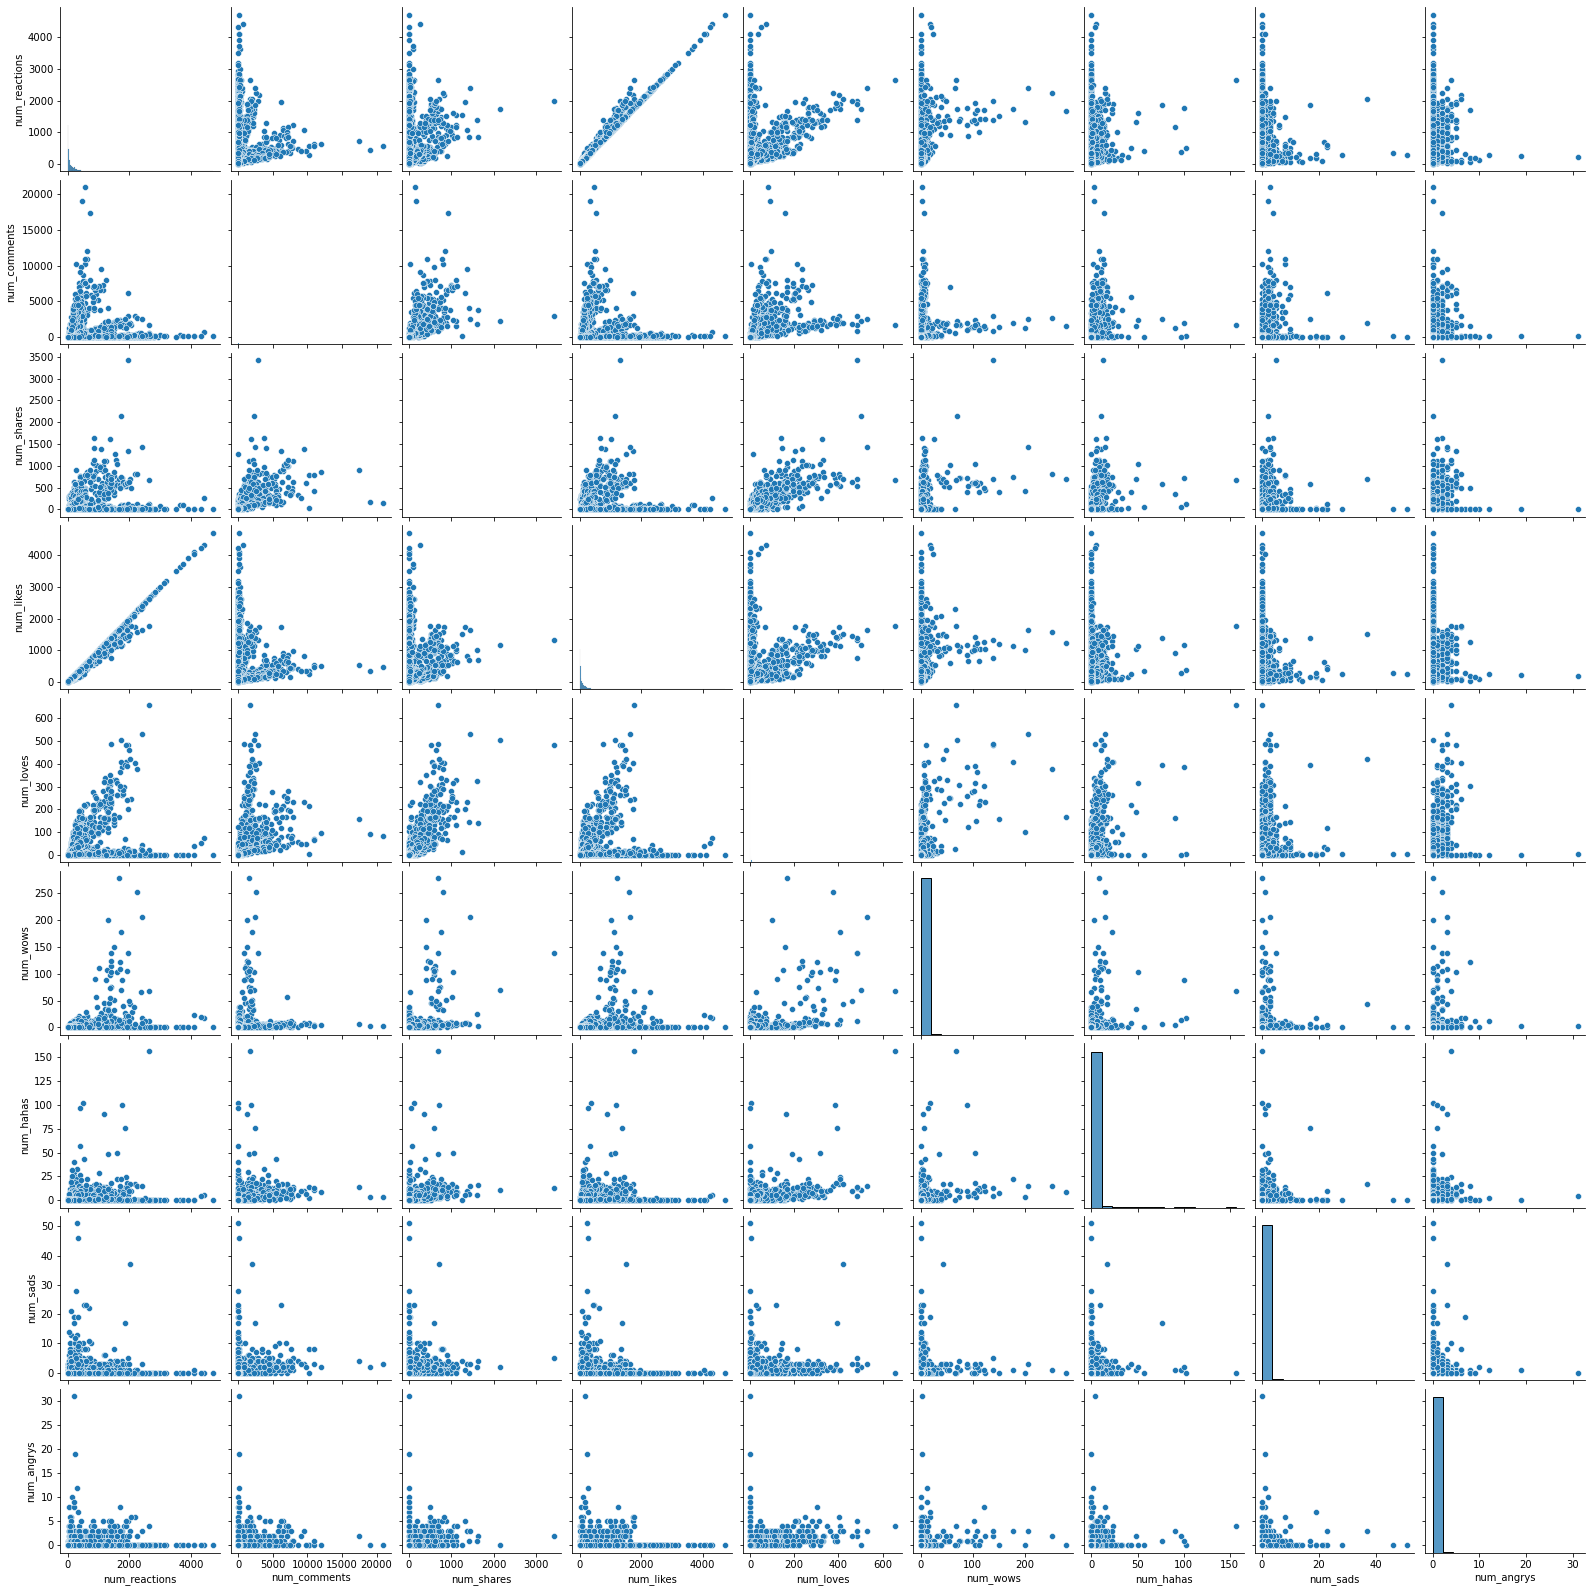

In [9]:
sns.pairplot(df)
plt.show()

Dummifico la columna de tipo de publicación y analizo al resto para evaluar si normalizar, estandarizar o hacer un robustscaler

In [10]:
df = pd.get_dummies(df, columns=['status_type'])


df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


<Figure size 432x288 with 0 Axes>

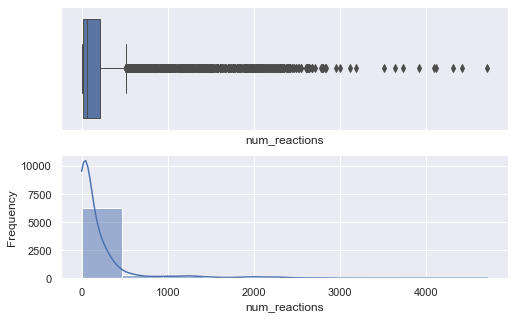

<Figure size 576x360 with 0 Axes>

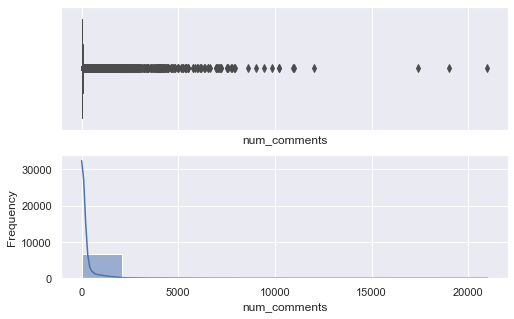

<Figure size 576x360 with 0 Axes>

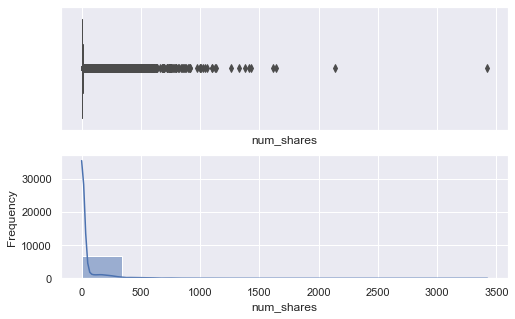

<Figure size 576x360 with 0 Axes>

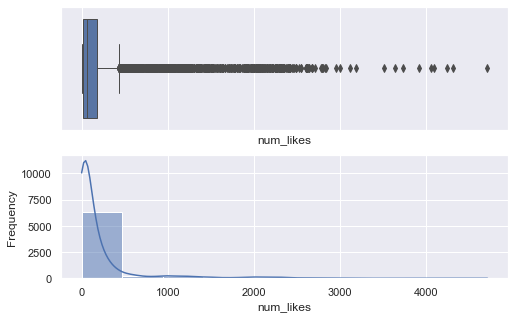

<Figure size 576x360 with 0 Axes>

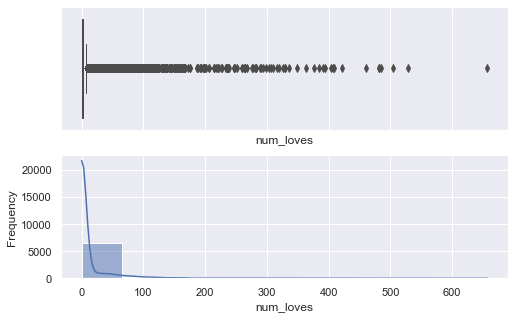

<Figure size 576x360 with 0 Axes>

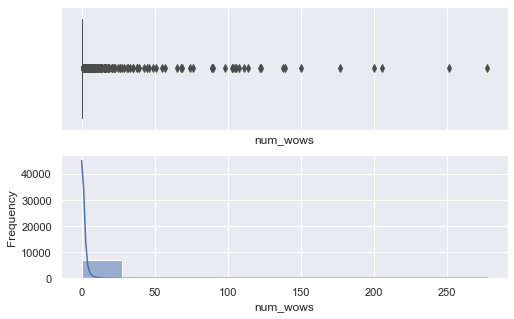

<Figure size 576x360 with 0 Axes>

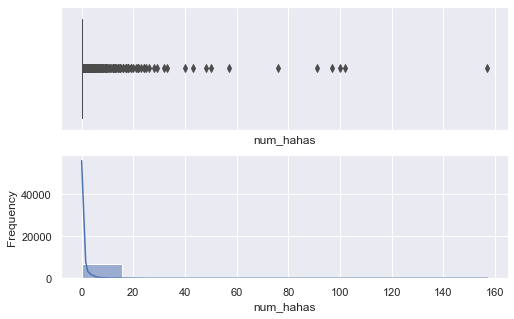

<Figure size 576x360 with 0 Axes>

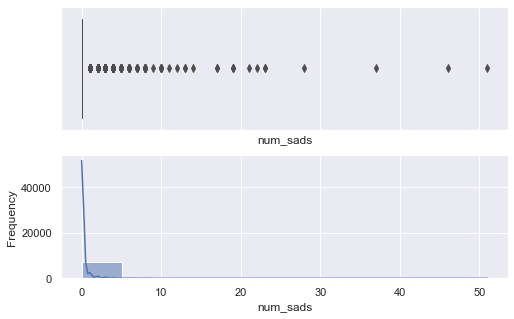

<Figure size 576x360 with 0 Axes>

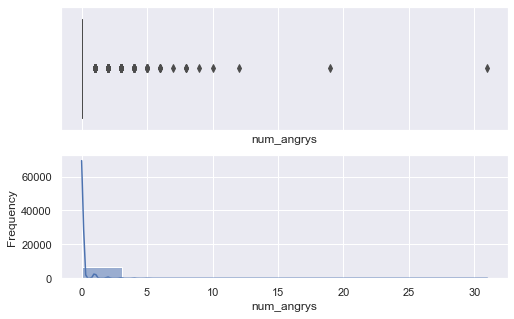

<Figure size 576x360 with 0 Axes>

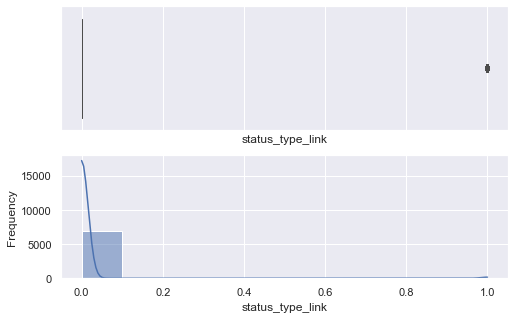

In [11]:
for i in df.iloc[:,0:10]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

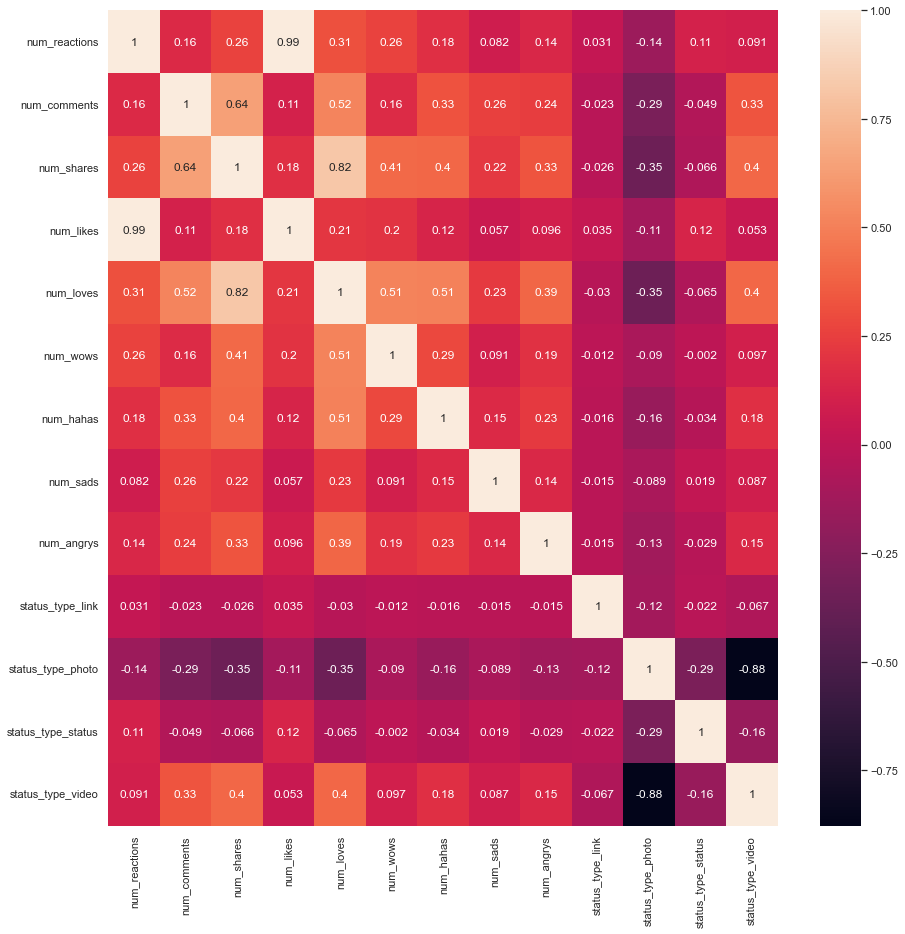

In [12]:
plt.figure(figsize=(15, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
from scipy import stats


for i in df:
    shapiro_test = stats.shapiro(df[i])
    print('Para la variable ', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Probablemente Gaussiana\n')
    else:
        print("Probablemente no Gaussiana\n")

Para la variable  num_reactions con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_comments con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_shares con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_likes con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_loves con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_wows con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_hahas con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_sads con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  num_angrys con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  status_type_link con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  status_type_photo con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  status_type_status con un p-value de  0.0
Probablemente no Gaussiana

Para la variable  sta

Ninguna columna tiene distribución normal y todas tienen outliers, por lo que que haré un Robustscaler en todos los caso

In [14]:
from sklearn import preprocessing 

df_tran = df.copy()

#RobustScaler para las columnas con outliers
columnsR = ['num_reactions','num_comments', 'num_shares', 'num_likes', 'num_loves', 
            'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
scalerRobust = preprocessing.RobustScaler().fit(df_tran[columnsR])
df_tran[columnsR] = scalerRobust.transform(df_tran[columnsR])

df_tran.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


**PCA (Principal Component Analisis)**

Aplico PCA para reducir el número de variables y faciltar el clausteirng

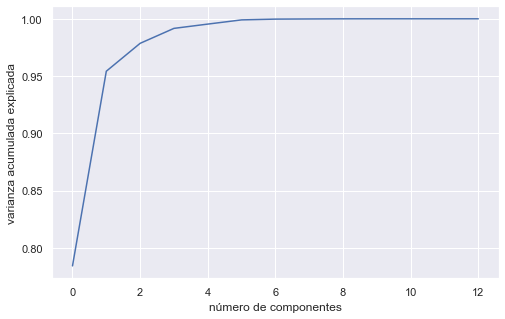

In [15]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_tran)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulada explicada');

El número de componentes para no perder más de un 5% de la información original podría estar entre 1 y 2. Probamos entrenarlo para que mantenga el 95% 

[Fuente](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [16]:
pca = PCA(.95).fit(df)
print('el número de componentes para mantener el 95% de la información original es:', pca.n_components_)

el número de componentes para mantener el 95% de la información original es: 2


Elijo 2 componentes para agrupar todas las varibles

In [17]:
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df_tran), columns=['componente 1', 'componente 2'], index=df.index)
df_pca.head()

,componente 1,componente 2
0,-249.415312,-262.515115
1,-279.731570,-261.943082
2,-267.589818,-263.129327
3,-279.785080,-262.243553
4,-279.578128,-261.469812


**Número de cluster para el método k-menas**

Primero buscaré el número de clusters con el método de codo

[Fuente](https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2)

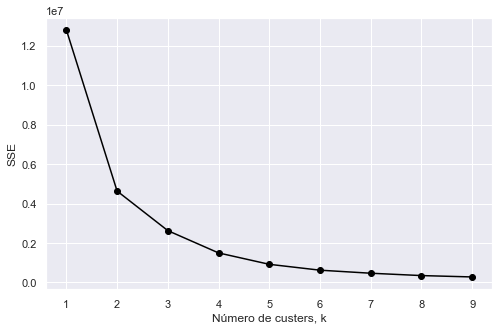

In [18]:
from sklearn.cluster import KMeans

ks = range(1, 10)
# SSE es (Sum of Squared errors)
SSE = []

for k in range(1, 10):
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_pca)
    
    # Append the inertia to the list of inertias
    SSE.append(model.inertia_)
    
plt.plot(ks, SSE, '-o', color='black')
plt.xlabel('Número de custers, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

In [19]:
!pip install --upgrade kneed
from kneed import KneeLocator

kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")
kl.elbow

3

En base al gráfico y al método para encontrar el "punto de codo" que ayuda a definir la cantidad de cluster a determinar en el modelo, utilizaré 3

**Modelo: K-means**

In [20]:
# Inicialización del modelo y entrenamiento (Nota: 42 es una convención, 
#pero la idea es fijar un punto a donde comienza el algoritmo)

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df_pca)

#predicciones
predicts = k_means.predict(df_pca)
predicts

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
#creo nuevo DF para sumarles los cluster
df_cluster = df.copy()

df_cluster['Cluster (K-means)'] = predicts
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,Cluster (K-means)
0,529,512,262,432,92,3,1,1,0,0,0,0,1,0
1,150,0,0,150,0,0,0,0,0,0,1,0,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1,0
3,111,0,0,111,0,0,0,0,0,0,1,0,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0,0


**Visualizacción de la cluster obtenidos con k-menas** 

[Fuente](https://github.com/aina1997/MasterClassDS/blob/main/Introducci%C3%B3%20a%20la%20Intel%C2%B7lig%C3%A8ncia%20artificial/AI-%20Unsupervised.ipynb)

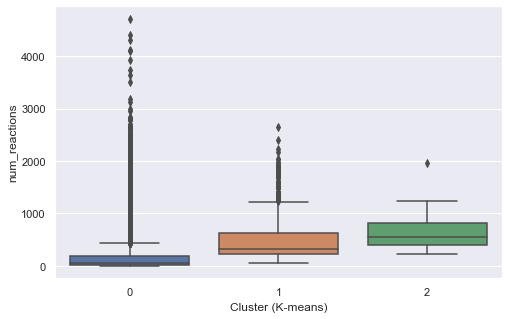

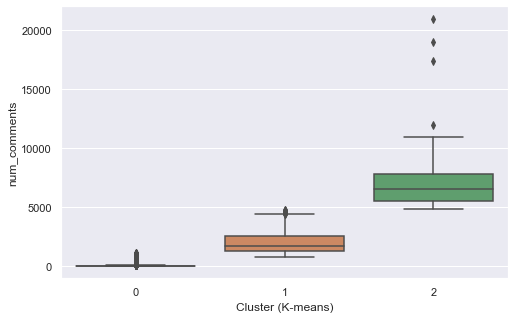

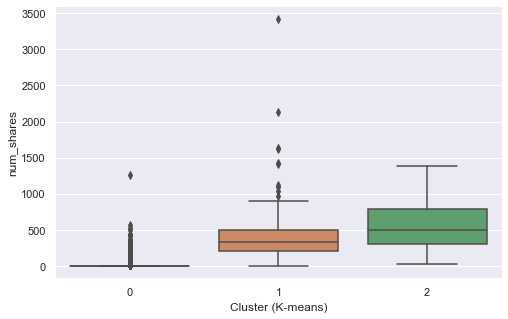

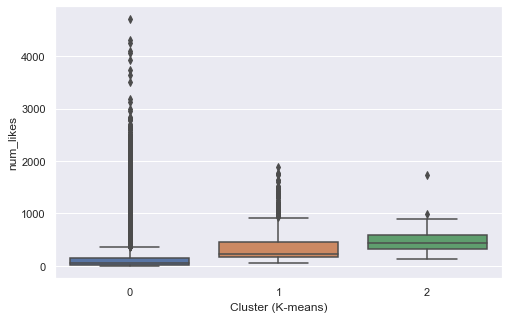

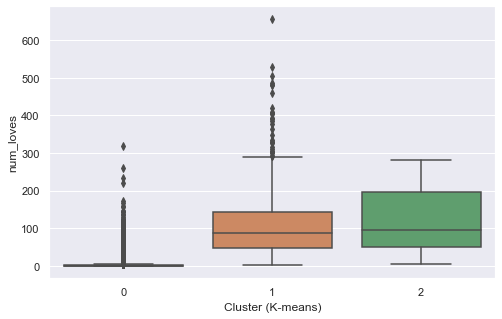

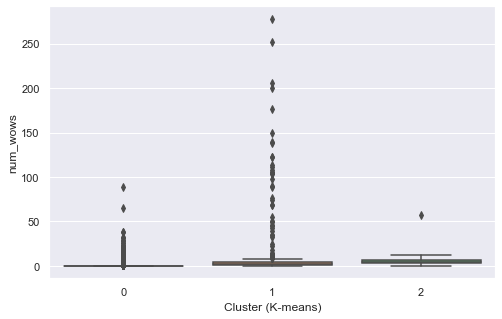

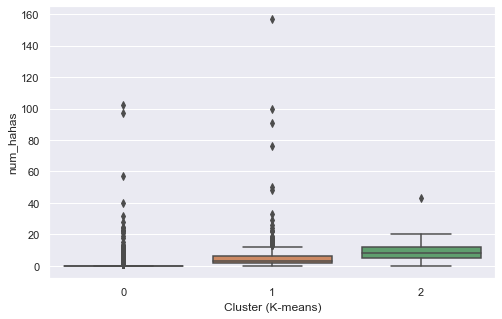

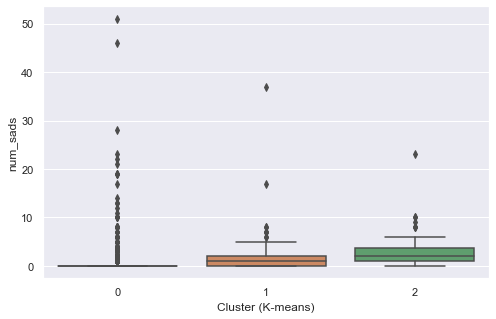

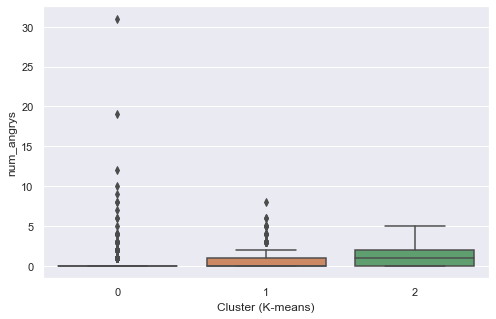

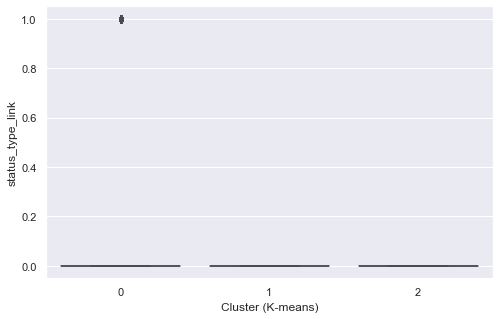

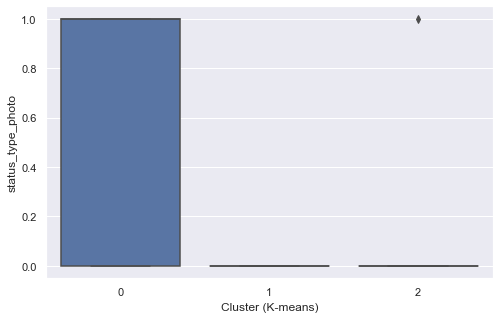

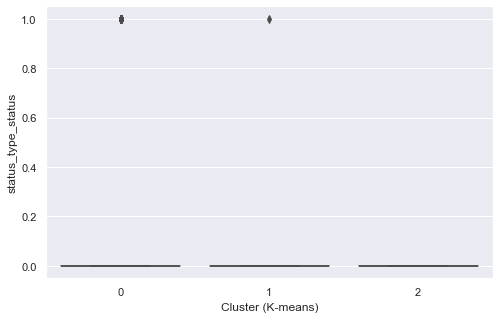

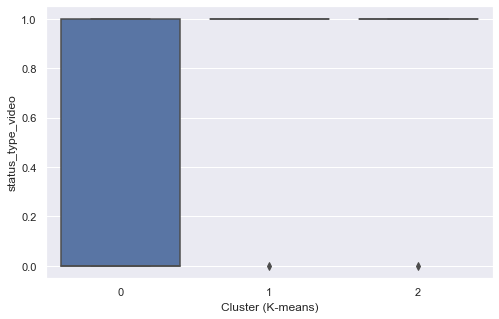

In [22]:
columns = df_cluster.columns[:-1]

    
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster (K-means)', y=i, data=df_cluster)

Se observa que el factor principal que ha tomado el modelo para hacer la clusterización es el número de comenterios, y luego el número y tipo de reacciones.

## Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

[Fuente](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)

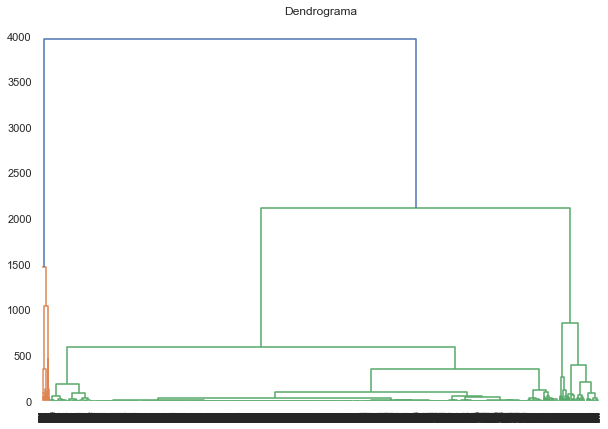

In [23]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward'))

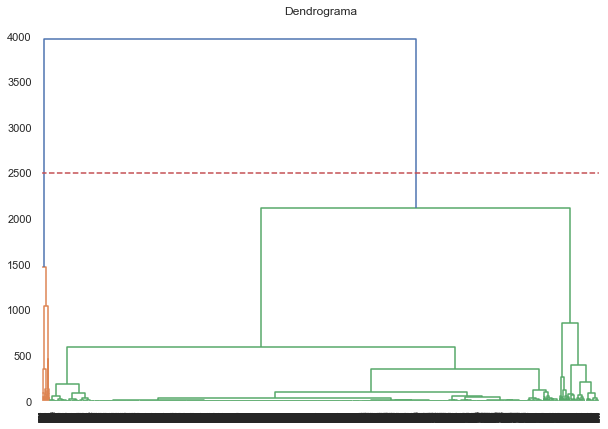

In [24]:
#Defino un umbral en 2500 (publicaciones) y dubujo una línea horizontal que atraviese la línea vertical más larga
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.axhline(y=2500, color='r', linestyle='--')

Utilizará 2 clusters

**Modelo: aglomerativo**

In [25]:
from sklearn.cluster import AgglomerativeClustering
aglomerativo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aglomerativo.fit(df_pca)

predicts_agg = aglomerativo.labels_

predicts_agg

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
df_cluster['Cluster (Agglomerative)'] = predicts_agg
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,Cluster (K-means),Cluster (Agglomerative)
0,529,512,262,432,92,3,1,1,0,0,0,0,1,0,0
1,150,0,0,150,0,0,0,0,0,0,1,0,0,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1,0,0
3,111,0,0,111,0,0,0,0,0,0,1,0,0,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0,0,0


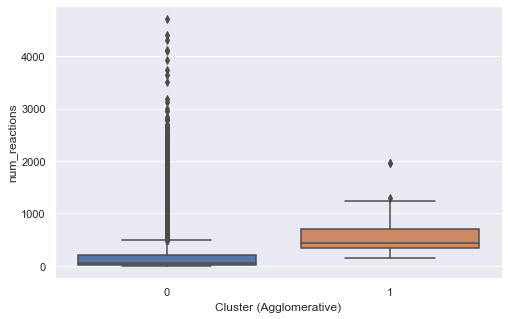

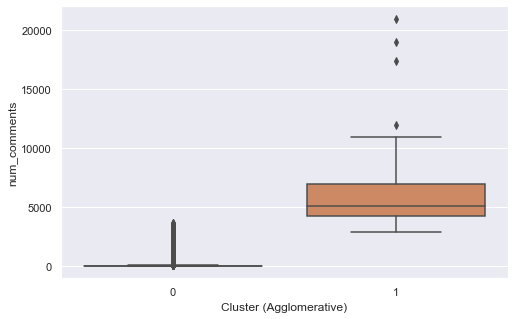

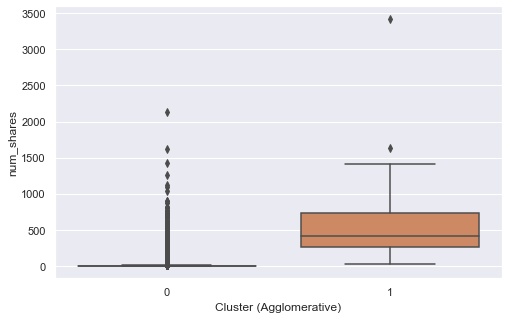

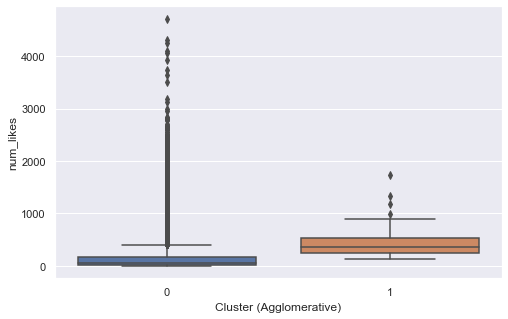

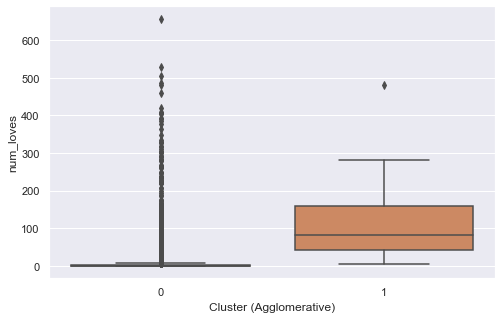

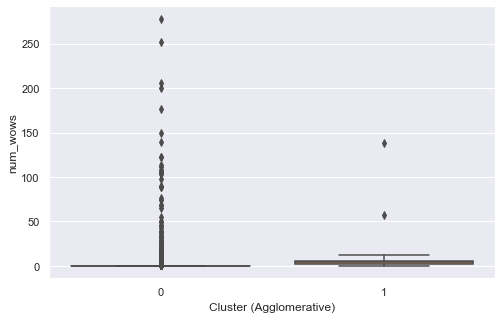

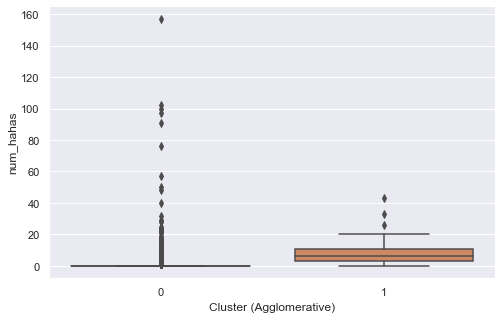

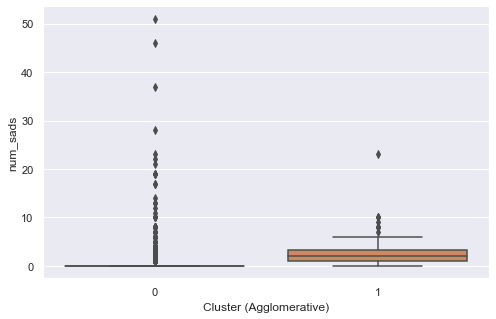

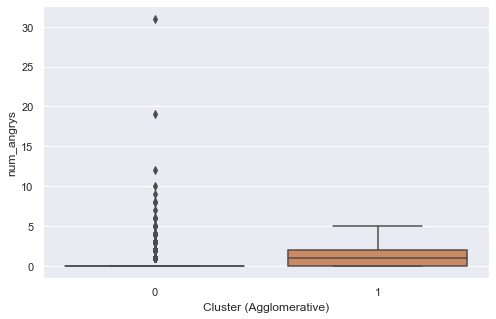

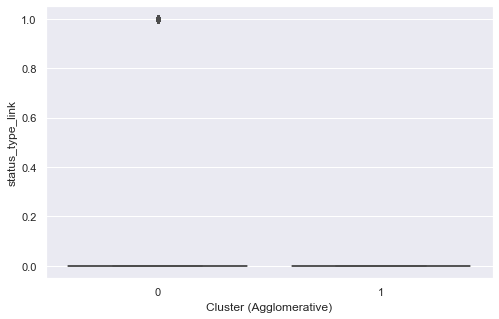

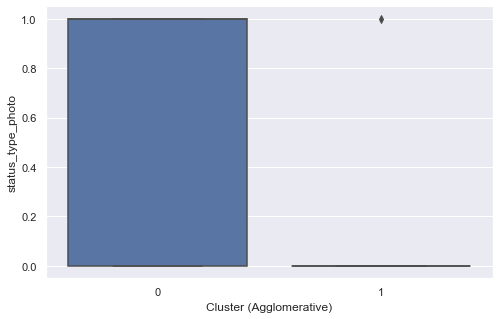

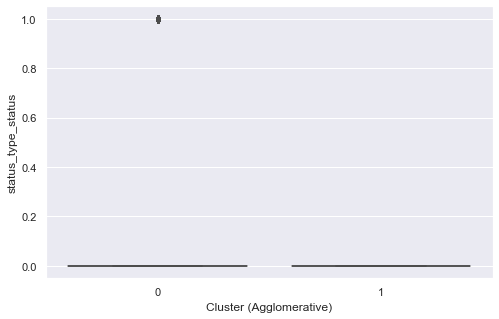

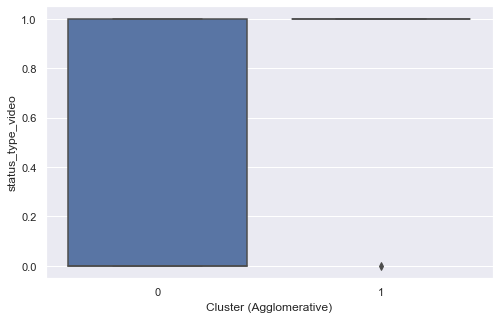

In [27]:
columns = df_cluster.columns[:-2]

    
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster (Agglomerative)', y=i, data=df_cluster)

Se ve que la principal variable que utilizó el modelo para la clusterización ha sido el número de reacciones, y dentro de estas los "Me gusta" y "Me encanta". En menor medido se tuvo también en cuenta el número de comentarios.

**Gráficos de dispersión de ambas clausterizaciones**

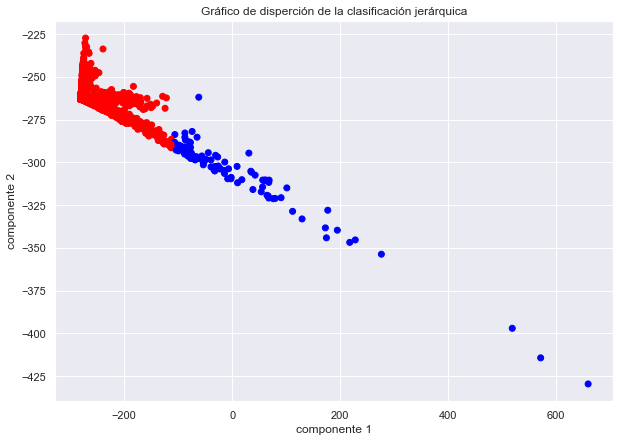

In [28]:
plt.figure(figsize=(10, 7))  

colors = np.array(["red",'blue'])
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.scatter(df_pca['componente 1'], df_pca['componente 2'], c=colors[aglomerativo.labels_])
plt.title('Gráfico de disperción de la clasificación jerárquica')
plt.show()


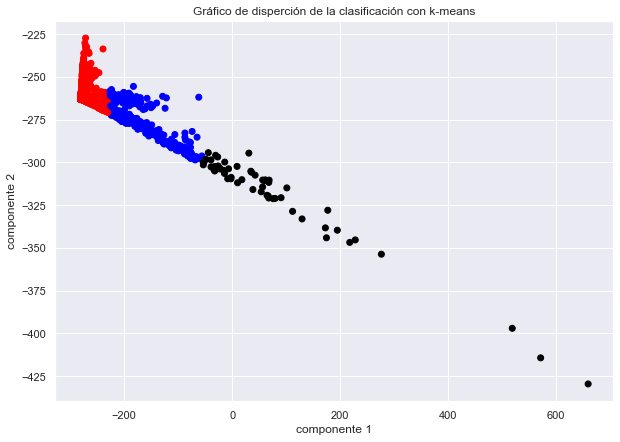

In [35]:
plt.figure(figsize=(10, 7))

colors = np.array(["red",'blue','black'])
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.scatter(df_pca['componente 1'], df_pca['componente 2'], c=colors[predicts])
plt.title('Gráfico de disperción de la clasificación con k-means')
plt.show()

En ambos casos se ven los clauster muy bien delimitados

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

[Fuente](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

In [30]:
from sklearn.metrics import silhouette_score


score_KM = silhouette_score(df, k_means.labels_, metric='euclidean')

score_agg = silhouette_score(df, aglomerativo.labels_, metric='euclidean')

print('El resultado de la prueba de siluata para el modelo k-means es de:', score_KM,
      '\nEl resultado de la prueba de siluata para el modelo jerárquico es de:', score_agg)


El resultado de la prueba de siluata para el modelo k-means es de: 0.7574497790645135 
El resultado de la prueba de siluata para el modelo jerárquico es de: 0.8850375434161767


Gráficos de Silhoutte Score para diferente números de clústers

[Fuente](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)

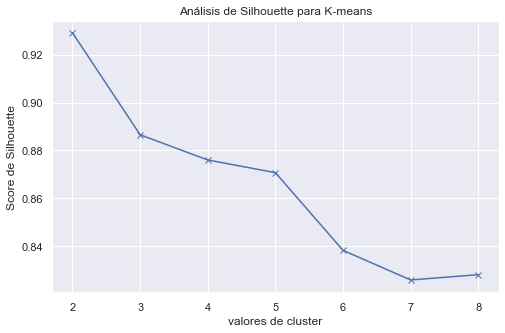

In [31]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_pca)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_pca, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('valores de cluster') 
plt.ylabel('Score de Silhouette') 
plt.title('Análisis de Silhouette para K-means')
plt.show()

A diferencia del método de codo, Silohutte propone 2 clúster para k-means. Pruebo dividiendo en dos y obteniendo el silohuette score de ello.

In [32]:
k_means2 = KMeans(n_clusters=2, random_state=42)
k_means2.fit(df_pca)

#predicciones
predicts2 = k_means2.predict(df_pca)
predicts2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [33]:
score_KM2 = silhouette_score(df, predicts2, metric='euclidean')

score_KM2

0.8679236736825717

Mejora el score de Silhouette, aunque queda por debajo del modelo jerárquico.

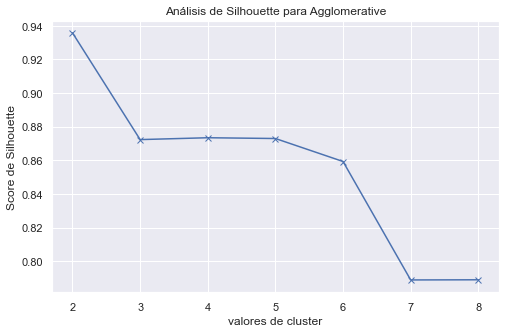

In [34]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 aglomerativo = AgglomerativeClustering(n_clusters=num_clusters)
 aglomerativo.fit(df_pca)
 cluster_labels = aglomerativo.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_pca, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('valores de cluster') 
plt.ylabel('Score de Silhouette') 
plt.title('Análisis de Silhouette para Agglomerative')
plt.show()

**Conclusiones** tras los diferentes análisis la mejor clusterización parece ser en dos grupos. De aplicarso ello, el modelo aglomerativo es el que da el mejor resultado de Silhouette: 0,88. Este pone el acento en dividir las publicaciones principalmente por el número de reacciones de las mismas.

De todos modos esto dependerá del tipo de análisis que se quiera hacer, pues si se prefiere poner el acento en el número de comentarios más que en el número de reacciones resulta pertinente dividir los datos en tres clusters, como propone la utilización del método de codo, y en ese caso el resultado de Silhoutte de la clusterización en tres grupos con el modelo k-menas es de 0.75, que sigue siendo una buena score.